# Advent of Code 2019

<div style="text-align: right"> Vedic Partap </div>

## Import and Utility Function

In [22]:
import re
import numpy as np
from itertools import combinations, permutations
from collections import defaultdict 
import matplotlib.pyplot as plt 

def get_input(day:int, year:int, t:type=int)->str:
    f  = "../data/adventofcode/{}/{}.txt".format(year,day)
    with open(f,'r') as file:
        return preprocess(file.readlines(),t);
    
def preprocess(S:str, t:type):
    ans=[]
    for s in S:
        ans.append([t(x) for x in s.strip().split(',')])
    return ans

    

## [Day 1: The Tyranny of the Rocket Equation](https://adventofcode.com/2019/day/1)

In [2]:
def part1(x:int)->int:
    return x//3-2

def part2(x:int)->int:
    tot = 0
    while x>0:
        x = max(part1(x),0)
        tot += x
    return tot

###################################

input1 = get_input(1,2019)
# PART-1
output1 = sum([ part1(x[0]) for x in input1])
print("Part 1:", output1)

# PART-2
output2 = sum([ part2(x[0]) for x in input1])
print("Part 2:", output2)

Part 1: 3402609
Part 2: 5101025


## [Day 2: 1202 Program Alarm](https://adventofcode.com/2019/day/2)

In [3]:
def solve(program: list, noun=12, verb=2)->int:
    program[1] = noun
    program[2] = verb
    i = 0
    while True:
    #     print(input2[i])
        if program[i] == 99:
            break;
        elif program[i] ==1:
            program[program[i+3]] = program[program[i+1]] + program[program[i+2]]
            i +=4
        elif input2[i] ==2:
            program[program[i+3]] = program[program[i+1]] * program[program[i+2]]
            i +=4
        else:
            raise Exception('Something Went Wrong')
    return program[0]

###################################

input2 = get_input(2,2019)[0]
#PART-1
program = input2[:]
print("Part 1:",solve(program))

# PART-2
for i in range(100):
    for j in range(100):
        program = input2[:]
        if solve(program,i,j) == 19690720:
            print("Part 2:",100*i + j)

Part 1: 3716293
Part 2: 6429


## [Day 3: Crossed Wires](https://adventofcode.com/2019/day/3)

In [4]:
def change(direction:str)->tuple:
        return {
            'R':(1,0),
            'L':(-1,0),
            'U':(0,1),
            'D':(0,-1)
        }[direction]

def addtuple(x:tuple, y:tuple)->tuple:
    return (x[0]+y[0], x[1]+y[1])

def traverse(steps:list, verbose)->dict:
    points = dict()
    curr = (0,0)
    cnt = 1
    for i in steps:
        d = change(i[0])
        num = int(i[1:])
        for _ in range(num):
            curr = addtuple(curr, d)
            if curr not in points:
                points[curr] = cnt
            cnt+=1
    return points

def dis(x:tuple, y:tuple)->int:
    return abs(x[0]-y[0])+abs(y[1]-x[1])

###################################

input3 = get_input(3,2019,str)


# PART-1
points0 = traverse(input3[0],0)
points1 = traverse(input3[1],0)

min_dis = 1e9
origin = (0,0)
for i in points0:
    if i in points1:
        min_dis = min(min_dis, dis(origin,i))
print("Part 1:", min_dis)

# PART-2
min_dis = 1e9
for i in points0:
    if i in points1:
        min_dis = min(min_dis,points0[i]+points1[i])
print("Part 2:", min_dis)

Part 1: 709
Part 2: 13836


## [Day 4: Secure Container](https://adventofcode.com/2019/day/4)

In [5]:
def check(num:int, part:int=1)->bool:
    s = str(num)
    same = False
    cnt = 1
    for i in range(1,6):
        if s[i]==s[i-1]:
            cnt +=1
        elif s[i]<s[i-1]:
            return False
        else:
            if part==2:
                same = same or (cnt==2)
            else:
                same = same or (cnt>=2)
            cnt = 1
    if part==2:
        same = same or (cnt==2)
    else:
        same = same or (cnt>=2)
    return same

###################################

input4 = [109165,576723]
output1 = sum([check(i) for i in range(input4[0],input4[1]+1) ])
print("Part 1:", output1)

output2 = sum([check(i,2) for i in range(input4[0],input4[1]+1) ])
print("Part 2:", output2)

Part 1: 2814
Part 2: 1991


## [Day 5: Sunny with a Chance of Asteroids](https://adventofcode.com/2019/day/5)

In [6]:
def solve_adv(program: list, inputs:list, program_counter:int=0)->list:
    i = program_counter
    input_counter = 0
    ans = []
    while True:
#         print(i)
        ins = "{:0>5}".format(str(program[i]))
#         print(ins)
        opcode, opcode1, mode1, mode2,mode3 = [int(x) for x in ins[::-1]]
        if opcode==9:
            break
        elif opcode==3:
            if input_counter>=len(inputs):
                return [ans, program, i, 0]
            program[program[i+1]]=inputs[input_counter]
            input_counter+=1
            i+=2
        elif opcode==4:
            ans.append(program[i+1] if mode1 else program[program[i+1]])
            i += 2
        elif opcode==5 or opcode==6:
            a = program[i+1] if mode1 else program[program[i+1]]
            b = program[i+2] if mode2 else program[program[i+2]]
            if (a and opcode==5) or (a==0 and opcode==6):
                i = b
            else:
                i += 3
        elif opcode==7:
            a = program[i+1] if mode1 else program[program[i+1]]
            b = program[i+2] if mode2 else program[program[i+2]]
            program[program[i+3]] = 1 if a<b else 0
            i += 4
            
        elif opcode==8:
            a = program[i+1] if mode1 else program[program[i+1]]
            b = program[i+2] if mode2 else program[program[i+2]]
            program[program[i+3]] = 1 if a==b else 0
            i += 4
                
        else:
            a = program[i+1] if mode1 else program[program[i+1]]
            b = program[i+2] if mode2 else program[program[i+2]]
            if opcode==1:
                program[program[i+3]] = a+b
            elif opcode==2:
                program[program[i+3]] = a*b
            else:
                print("ERROR: ",i,program[i])
                raise Exception('Something Went Wrong')
            i += 4
    return [ans, program, i,1]

###################################

input5 = get_input(5,2019)[0]
output5_1 = solve_adv(input5[:],[1])[0]
print("Part 1:", output5_1[-1]) # Part 1: 13978427

output5_2 = solve_adv(input5[:],[5])[0]
print("Part 2:", output5_2[-1]) # Part 2: 11189491

Part 1: 13978427
Part 2: 11189491


   ## [Day 6: Universal Orbit Map](https://adventofcode.com/2019/day/6)

In [7]:
ans =0
def solve6(data:list)->int:
    global ans
    ans =0
    g = defaultdict(list)
    nodes = set()
    parent = defaultdict()
    for i in data:
        x,y = i[0].split(')')
#         print(x,y)
        g[x].append(y)
        nodes.add(x)
        nodes.add(y)
        parent[y] = x
    visited = {k:0 for k in nodes}
    for node in nodes - parent.keys():
        if not visited[node]:
            dfs(g,node,visited,0)
    visited = {k:0 for k in nodes}
    dis = find_dis('YOU','SAN',g,visited,parent)
    return ans,dis-2
        
def dfs(g:dict, node:str, visited:dict, depth:int):
    global ans
#     print(node,ans)
    visited[node] = 1
    ans += depth
    for child in g[node]:
        if not visited[child]:
            dfs(g, child, visited, depth+1)
    
def find_dis(node1:str, node2:2, g:dict, visited:dict, parent:dict)->int:
    if(node1==node2):
        return 0
    visited[node1] = 1
    mini = 1e9
    for child in g[node1]:
        if not visited[child]:
            mini = min(mini,find_dis(child,node2, g, visited, parent))
    if node1 in parent and not visited[parent[node1]]:
        mini = min(mini,find_dis(parent[node1],node2, g, visited, parent))
    return mini+1
 
###################################
input6  = get_input(6,2019,str)
output6_1,output6_2  = solve6(input6)
print("Part 1:",output6_1) # 122782
print("Part 2:", output6_2) #271


Part 1: 122782
Part 2: 271


## [Day 7: Amplification Circuit](https://adventofcode.com/2019/day/7)

In [8]:
def find_maximum(program:list, values:list)->int:
    maxy = 0
    for i in permutations(values, r=5):
        i = [int(x) for x in i]
        out = solve7(program[:],i)
        if out > maxy:
            maxy = out
    return maxy

def solve7(program:list, setting:list)->int:
    NUM_PROC = 5
    processes = [[program[:],0] for i in range(NUM_PROC)]
    inputs = [[i] for i in setting]
    inputs[0].append(0) # start signal
    output = 0
    process_count = 0
    halt_process = []
    while True:
        if len(halt_process)==NUM_PROC:
            break
        if process_count not in halt_process:
            out = solve_adv(processes[process_count][0], # Program
                              inputs[process_count],   # input
                              processes[process_count][1]) # program counter
            if out[3] == 1:
                halt_process.append(process_count)
            processes[process_count] = [out[1], out[2]]
            inputs[process_count] = []
            
            process_count = (process_count+1)%NUM_PROC
            inputs[process_count].append(out[0][0])
        else:
            process_count = (process_count+1)%NUM_PROC
    return out[0][0]     

###################################

input7 = get_input(7,2019)[0]
values = [0,1,2,3,4]
print("Part 1:",find_maximum(input7[:], values))

values = [5,6,7,8,9]
print("Part 2:",find_maximum(input7[:], values))

Part 1: 11828
Part 2: 1714298


Part 1: 1596
Part 2:


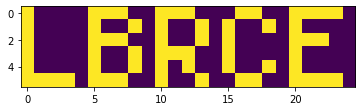

In [23]:
def count_dis(s:str)->list:
    return [s.count(i) for i in ['0','1','2']]
    
def decode(layers:list)->list:
    ans = [0 for _ in layers[0]]
    for i in range(X*Y):
        for layer in layers:
#             print(layer)
            if layer[i] <= '1':
                ans[i] = layer[i]
                break
    return "".join(ans)


###################################

input8 = get_input(8,2019,str)[0][0]
X = 25
Y = 6

layers = [input8[i:i+X*Y] for i in range(0,len(input8),X*Y)]
counts = [count_dis(i) for i in layers]
sorted_layers = sorted(counts)
print("Part 1:", sorted_layers[0][1]*sorted_layers[0][2])
# print(layers)
out = decode(layers)
image_2d  = [[int(x) for x in out[i:i+25]] for i in range(0,150,25)]
print("Part 2:")
mat = np.array(image_2d)
plt.imshow(mat,interpolation='nearest');